In [4]:
#from MASS import MASS, get_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()

In [5]:
df=pd.read_csv('../data/20221212-pheno_mat_select_red-builds_acid_from.tsv', sep='\t' ,index_col='id')  # ,index_col='strain',index_col='Mutant'
print('df.shape',df.shape)
df=df.drop(df[(df.std(axis=1)==0)].index)
print('df.shape',df.shape)
n_unique=[]
for c in df.columns:
    n_unique.append((c,df[c].nunique()))
df_n_unique=pd.DataFrame(n_unique, columns=['col','nunique'])    
print(df_n_unique['nunique'].value_counts())
df=df[df_n_unique.query("nunique==2")['col'].values]
print('df.shape',df.shape)
df=df.drop(df[(df.std(axis=1)==0)].index)
print('df.shape',df.shape)
df.head()

df.shape (637, 46)
df.shape (636, 46)
nunique
2    46
Name: count, dtype: int64
df.shape (636, 46)
df.shape (636, 46)


,MU:galactitol_builds acid from,MU:glycerol_builds acid from,MU:lactose_builds acid from,MU:maltose_builds acid from,MU:sucrose_builds acid from,MU:amygdalin_builds acid from,MU:arbutin_builds acid from,MU:cellobiose_builds acid from,MU:D-arabinose_builds acid from,MU:D-arabitol_builds acid from,...,MU:methyl beta-D-xylopyranoside_builds acid from,MU:myo-inositol_builds acid from,MU:N-acetylglucosamine_builds acid from,MU:raffinose_builds acid from,MU:ribitol_builds acid from,MU:turanose_builds acid from,MU:xylitol_builds acid from,MU:trehalose_builds acid from,MU:Potassium 2-ketogluconate_builds acid from,MU:Potassium 5-ketogluconate_builds acid from
id,,,,,,,,,,,,,,,,,,,,,
416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
628,0,0,0,2,2,0,2,2,0,0,...,0,0,2,0,0,0,0,2,0,0
599,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [6]:
df.describe()

,MU:galactitol_builds acid from,MU:glycerol_builds acid from,MU:lactose_builds acid from,MU:maltose_builds acid from,MU:sucrose_builds acid from,MU:amygdalin_builds acid from,MU:arbutin_builds acid from,MU:cellobiose_builds acid from,MU:D-arabinose_builds acid from,MU:D-arabitol_builds acid from,...,MU:methyl beta-D-xylopyranoside_builds acid from,MU:myo-inositol_builds acid from,MU:N-acetylglucosamine_builds acid from,MU:raffinose_builds acid from,MU:ribitol_builds acid from,MU:turanose_builds acid from,MU:xylitol_builds acid from,MU:trehalose_builds acid from,MU:Potassium 2-ketogluconate_builds acid from,MU:Potassium 5-ketogluconate_builds acid from
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,...,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,0.028302,0.443396,0.764151,1.500000,1.405660,0.877358,1.113208,1.289308,0.075472,0.078616,...,0.172956,0.091195,1.345912,0.562893,0.034591,0.610063,0.015723,1.377358,0.047170,0.075472
std,0.236412,0.831432,0.972555,0.866707,0.914743,0.993232,0.994353,0.957989,0.381413,0.388960,...,0.562580,0.417549,0.939005,0.900117,0.260946,0.921566,0.176772,0.926796,0.303743,0.381413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
pd.value_counts(df.values.ravel(), dropna=False)

0    20595
2     8661
Name: count, dtype: int64

In [8]:
pd.value_counts(df.values.ravel(),normalize=True, dropna=False)

0    0.703958
2    0.296042
Name: proportion, dtype: float64

In [10]:
def high_corr(df, thres=0.8):
    corr_matrix_raw = df.corr(method='spearman')
    corr_matrix = corr_matrix_raw.abs()
    high_corr_var_=np.where(corr_matrix>thres)
    high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y], corr_matrix_raw.iloc[x,y]) for x,y in zip(*high_corr_var_) if x!=y and x<y]
    return high_corr_var
high_corr(df, thres=0.7)

[]

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
#             vmin=-1, vmax=1
           )

In [13]:
df_new=df.replace(2,1)
X=df_new.values
X[X==0]=-1

n, d = X.shape

In [14]:
n, d

(636, 46)

In [15]:
X.dtype##dtype('int64') 

dtype('int64')

In [16]:
df_new.columns

Index(['MU:galactitol_builds acid from', 'MU:glycerol_builds acid from',
       'MU:lactose_builds acid from', 'MU:maltose_builds acid from',
       'MU:sucrose_builds acid from', 'MU:amygdalin_builds acid from',
       'MU:arbutin_builds acid from', 'MU:cellobiose_builds acid from',
       'MU:D-arabinose_builds acid from', 'MU:D-arabitol_builds acid from',
       'MU:D-fructose_builds acid from', 'MU:D-fucose_builds acid from',
       'MU:D-galactose_builds acid from', 'MU:D-glucose_builds acid from',
       'MU:D-lyxose_builds acid from', 'MU:D-mannitol_builds acid from',
       'MU:D-mannose_builds acid from', 'MU:D-ribose_builds acid from',
       'MU:D-sorbitol_builds acid from', 'MU:D-tagatose_builds acid from',
       'MU:D-xylose_builds acid from', 'MU:erythritol_builds acid from',
       'MU:esculin_builds acid from', 'MU:gentiobiose_builds acid from',
       'MU:gluconate_builds acid from', 'MU:glycogen_builds acid from',
       'MU:inulin_builds acid from', 'MU:L-arabinose_

In [17]:
df_new.describe()

,MU:galactitol_builds acid from,MU:glycerol_builds acid from,MU:lactose_builds acid from,MU:maltose_builds acid from,MU:sucrose_builds acid from,MU:amygdalin_builds acid from,MU:arbutin_builds acid from,MU:cellobiose_builds acid from,MU:D-arabinose_builds acid from,MU:D-arabitol_builds acid from,...,MU:methyl beta-D-xylopyranoside_builds acid from,MU:myo-inositol_builds acid from,MU:N-acetylglucosamine_builds acid from,MU:raffinose_builds acid from,MU:ribitol_builds acid from,MU:turanose_builds acid from,MU:xylitol_builds acid from,MU:trehalose_builds acid from,MU:Potassium 2-ketogluconate_builds acid from,MU:Potassium 5-ketogluconate_builds acid from
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,...,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,-0.971698,-0.556604,-0.235849,0.500000,0.405660,-0.122642,0.113208,0.289308,-0.924528,-0.921384,...,-0.827044,-0.908805,0.345912,-0.437107,-0.965409,-0.389937,-0.984277,0.377358,-0.952830,-0.924528
std,0.236412,0.831432,0.972555,0.866707,0.914743,0.993232,0.994353,0.957989,0.381413,0.388960,...,0.562580,0.417549,0.939005,0.900117,0.260946,0.921566,0.176772,0.926796,0.303743,0.381413
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,0.500000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
75%,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
X

array([[-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1,  1, ..., -1, -1, -1]])

## MASS


### fast and monotone to solve 

In [ ]:
# list(range(10,0,-1))
# len(range(d-1,0,-1)),d
# df_z_all=pd.read_csv('MIP_result_z_all38_fast.csv')
# df_z_all=pd.read_csv('MIP_result_z_all38_greedy2.csv')
# df_z_all

In [19]:
my_range=range(d-2,0,-2)#range(d-1,0,-1)
my_l=len(my_range)#d-1#37
myseed = 2020
r = np.random.RandomState([myseed])
my_range

range(44, 0, -2)

In [ ]:
z_all=[]
B_all=[]
obj_all=[]
df_z_all_first12=pd.read_csv('../Results/MIP_classify_z_all_first12.csv')
for r in my_range:#range(25,0,-1):#range(45, 0, -1)
    print(r)
    if  (r<=2): #(r==d-1) |
        bestB, bestb0, bestz, bestKSI,obj_=MMRP_classify2022(X, r)
    elif r>=d-12:
        bestz_12=df_z_all_first12.iloc[d-1-r].values
        print('solving optimal with saved int as start  ', end='')
        bestB, bestb0, bestz, bestKSI,obj_=MMRP_classify2022(X, r, z_start=bestz_12, LP=True)
    else:
        # r-1 heuristics
        print('r-1 heuristics  ', end='')
        bestB, bestb0, bestz_1, bestKSI,obj_=MMRP_classify2022(X, r, z_start=None, z_greedy=z_prev,n_greedy=1)
        # r-2 heuristics
        print('r-2 heuristics  ', end='')
        bestB, bestb0, bestz_2, bestKSI,obj_=MMRP_classify2022(X, r, z_start=bestz_1, z_greedy=z_prev,n_greedy=2)
        # optimal
        print('solving optimal with r-2 heuristics as start  ', end='')
        bestB, bestb0, bestz, bestKSI,obj_=MMRP_classify2022(X, r, z_start=bestz_2,TimeLimit = 1500)
    bestz=bestz.astype(int) 
    z_prev=np.copy(bestz).astype(int) 
    z_all.append(bestz)
    B_all.append(bestB)
    obj_all.append(obj_)
    
    df_z_all=pd.DataFrame.from_records(z_all, columns=df_new.columns)
    df_z_all.to_csv('../Results/MIP_classify_z_all.csv',index=False)

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(np.array(z_all).astype(int), 
            xticklabels=df_new.columns.values,
            yticklabels=my_range, vmin=0, vmax=1)

In [ ]:
# obj_all=np.zeros((my_l, ))
# obj_all_test=np.zeros((my_l, ))
# r2_score_=np.zeros((my_l, ))d
# # r2_score_test=np.zeros((my_l, ))
# f1_score_micro=np.zeros((my_l, ))
# # f1_score_micro_test=np.zeros((my_l, ))
# accuracy=np.zeros((my_l, ))
# accuracy_test=np.zeros((my_l, ))
# wmse=np.zeros((my_l, ))
z_all=[]
B_all=[]
obj_all=[]

z_start68=np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1])
z_prev=z_start68
for r in my_range:    
#     z_start_= df_z_all.loc[d-1-r,:].values
    print(r)
    if r>=d-8: #74,72,70,68
        bestB, bestb0, bestz, bestKSI, obj,m = MASS(X, r, z_start=z_start68,lamda=0)
  #         bestB, bestb0, bestz , bestW = MMRP_reg(X, r, z_start=z_start_)
    elif r<8:#6,4,2
        bestB, bestb0, bestz, bestKSI, obj,m = MASS(X, r, z_greedy=z_prev,n_greedy=2,lamda=0) 
        bestB, bestb0, bestz, bestKSI, obj,m = MASS(X, r)
    else:#66--8
        bestB, bestb0, bestz, bestKSI, obj,m = MASS(X, r, z_greedy=z_prev,n_greedy=0,lamda=0)
        bestB, bestb0, bestz, bestKSI, obj,m = MASS(X, r, z_start=bestz, z_greedy=z_prev,n_greedy=2,lamda=0)
    bestz=bestz.astype(int) 
    z_prev=np.copy(bestz).astype(int) 
#         bestB, bestb0, bestz , bestW = MMRP_reg(X, r, z_start=z_start_, z_greedy=bestz)
    z_all.append(bestz)
    B_all.append(bestB)
    obj_all.append(obj)#sum( sum(abs(bestW)))
#     ## train error analysis

74
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
72
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
70
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
68
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
66
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
64
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
62
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
60
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Ma

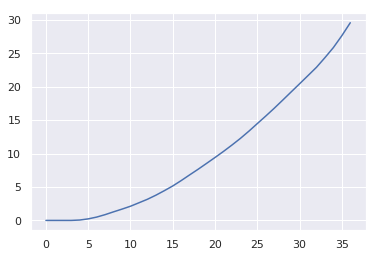

In [ ]:
pd.Series(obj_all).plot()

In [ ]:
str_times=', '.join([', '.join([str(char)]) for char in list(my_range)]).split(',')
# ' '.join([' '.join([str(char),str(char)]) for char in list(range(1,16))])
plt.figure(figsize=(20,8))
sns.heatmap(np.array(z_all).astype(int), 
            xticklabels=df_new.columns.values,
            yticklabels=str_times, vmin=0, vmax=1)

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(np.array(z_all).T.astype(int), 
            xticklabels=str_times,
            yticklabels=df_new.columns.values, vmin=0, vmax=1)